In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_excel("Data_Train.xlsx")
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


Note that The feature "Route" and "Total_Stops" have missing values so we will drop the particular null data point

In [4]:
train_data.dropna(inplace = True)

In [5]:
train_data["Date_of_Journey"] = pd.to_datetime(train_data["Date_of_Journey"])
train_data["Dep_Time"] = pd.to_datetime(train_data["Dep_Time"])
train_data["Arrival_Time"] = pd.to_datetime(train_data["Arrival_Time"])

In [6]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-06-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-25 05:50:00,2021-06-25 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-06-25 18:05:00,2021-06-25 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-06-25 16:50:00,2021-06-25 21:35:00,4h 45m,1 stop,No info,13302


Now we can convert "Date_of_Journey" feature into two features: "Journey_Day" and "Journey_Month"

In [7]:
train_data["Journey_Day"] = train_data["Date_of_Journey"].dt.day
train_data["Journey_Month"] = train_data["Date_of_Journey"].dt.month
train_data.drop("Date_of_Journey", axis = 1, inplace = True)

In [8]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-06-25 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-06-25 05:50:00,2021-06-25 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-06-25 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-06-25 18:05:00,2021-06-25 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-06-25 16:50:00,2021-06-25 21:35:00,4h 45m,1 stop,No info,13302,3,1


Now, similar datapreprocessing can be applied to the features "Dep_Time" and "Arrival_Time"

In [9]:
train_data["Dep_Time_Hr"] = train_data["Dep_Time"].dt.hour
train_data["Dep_Time_Min"] = train_data["Dep_Time"].dt.minute

train_data["Arrival_Time_Hr"] = train_data["Arrival_Time"].dt.hour
train_data["Arrival_Time_Min"] = train_data["Arrival_Time"].dt.minute

train_data.drop("Dep_Time", axis = 1, inplace = True)
train_data.drop("Arrival_Time", axis = 1, inplace = True)

In [10]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


Now converting "Duration" feature into appropriate numeric

In [11]:
duration_list = list(train_data["Duration"])

for i in range(len(duration_list)):
    if len(duration_list[i].split(" ")) == 2:
        pass
    else:
        if "h" in duration_list[i]:
            duration_list[i] = duration_list[i] + " 0m"
        else:
            duration_list[i] = "0h "+ duration_list[i]
train_data["Duration"] = duration_list
duration_hr = []
duration_min = []
for i in range(len(duration_list)):
    temp_hr = int(duration_list[i].split(" ")[0][:-1])
    temp_min = int(duration_list[i].split(" ")[1][:-1])
    duration_hr.append(temp_hr)
    duration_min.append(temp_min)
train_data["Duration_hr"] = duration_hr
train_data["Duration_min"] = duration_min

train_data.drop("Duration", axis = 1, inplace = True)
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_hr,Duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,5,1,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,6,9,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,5,12,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,3,1,16,50,21,35,4,45


Performing the above operations on test set too

In [12]:
test_data = pd.read_excel("Test_set.xlsx")
test_data.dropna(inplace = True)
test_data["Date_of_Journey"] = pd.to_datetime(test_data["Date_of_Journey"])
test_data["Dep_Time"] = pd.to_datetime(test_data["Dep_Time"])
test_data["Arrival_Time"] = pd.to_datetime(test_data["Arrival_Time"])

test_data["Journey_Day"] = test_data["Date_of_Journey"].dt.day
test_data["Journey_Month"] = test_data["Date_of_Journey"].dt.month
test_data.drop("Date_of_Journey", axis = 1, inplace = True)

test_data["Dep_Time_Hr"] = test_data["Dep_Time"].dt.hour
test_data["Dep_Time_Min"] = test_data["Dep_Time"].dt.minute

test_data["Arrival_Time_Hr"] = test_data["Arrival_Time"].dt.hour
test_data["Arrival_Time_Min"] = test_data["Arrival_Time"].dt.minute

test_data.drop("Dep_Time", axis = 1, inplace = True)
test_data.drop("Arrival_Time", axis = 1, inplace = True)

duration_list = list(test_data["Duration"])

for i in range(len(duration_list)):
    if len(duration_list[i].split(" ")) == 2:
        pass
    else:
        if "h" in duration_list[i]:
            duration_list[i] = duration_list[i] + " 0m"
        else:
            duration_list[i] = "0h "+ duration_list[i]
test_data["Duration"] = duration_list
duration_hr = []
duration_min = []
for i in range(len(duration_list)):
    temp_hr = int(duration_list[i].split(" ")[0][:-1])
    temp_min = int(duration_list[i].split(" ")[1][:-1])
    duration_hr.append(temp_hr)
    duration_min.append(temp_min)
test_data["Duration_hr"] = duration_hr
test_data["Duration_min"] = duration_min

test_data.drop("Duration", axis = 1, inplace = True)

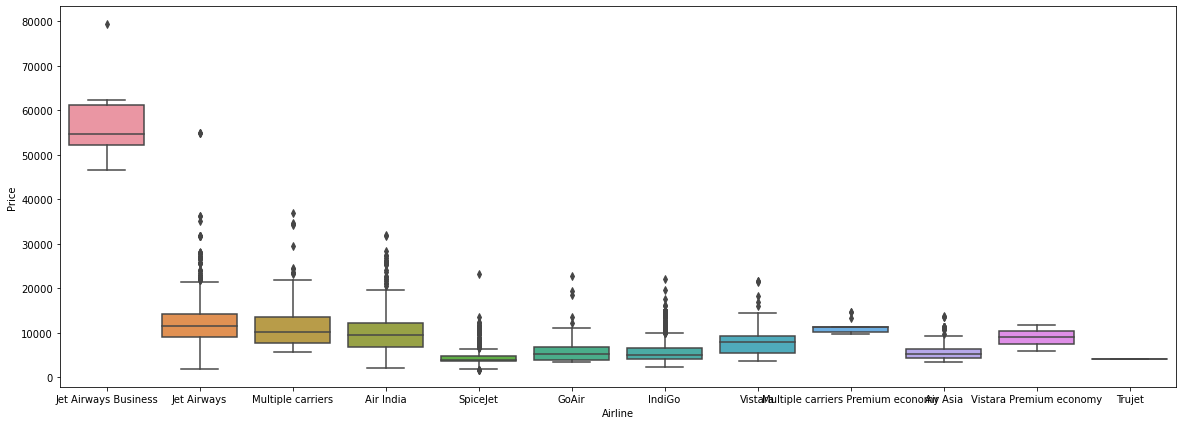

In [13]:
plt.figure(figsize=(20,7))
sns.boxplot(y = "Price", x = "Airline", data = train_data.sort_values("Price",ascending = False) )
plt.show()

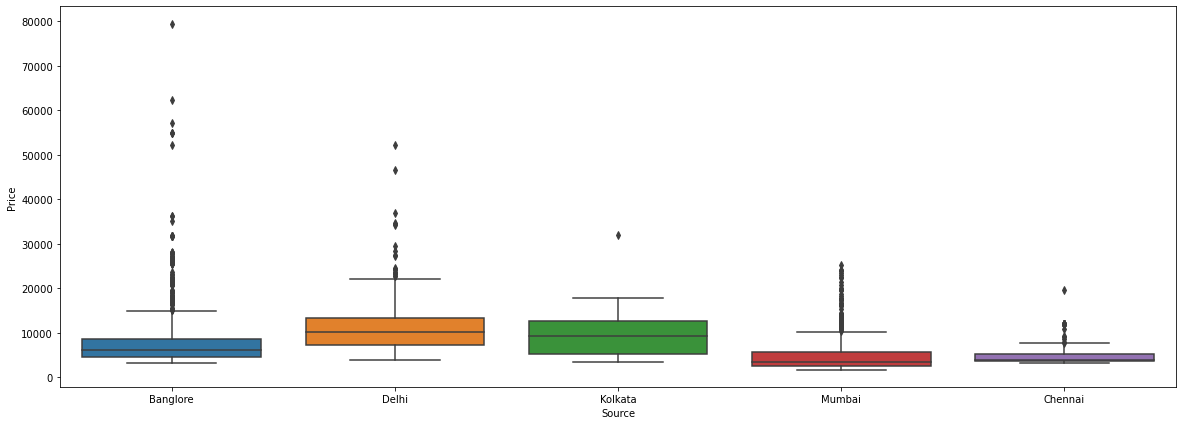

In [14]:
plt.figure(figsize=(20,7))
sns.boxplot(y = "Price", x = "Source", data = train_data.sort_values("Price",ascending = False) )
plt.show()

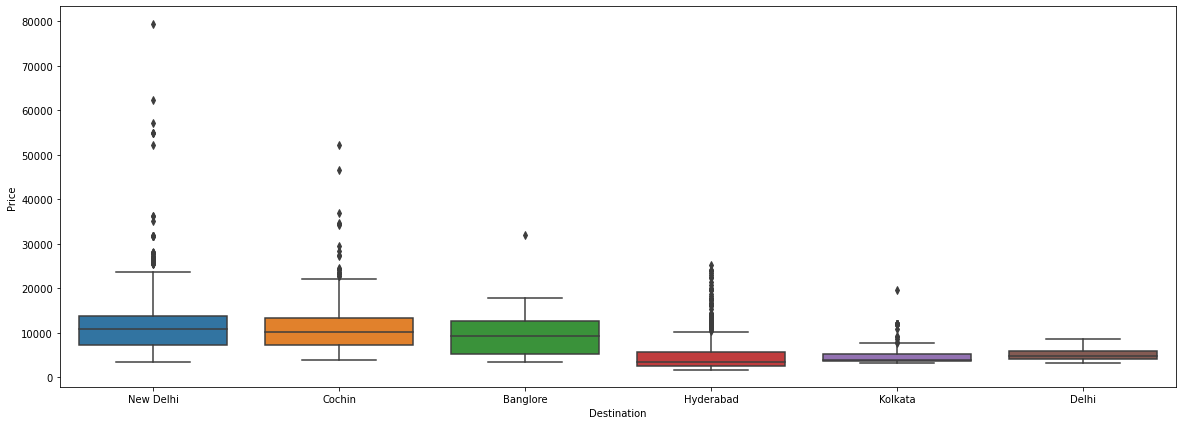

In [15]:
plt.figure(figsize=(20,7))
sns.boxplot(y = "Price", x = "Destination", data = train_data.sort_values("Price",ascending = False) )
plt.show()

In [16]:
# length of train and test sets
N = len(train_data)
Nt = len(test_data)

# Joining two datasets
combined_data = pd.concat([train_data, test_data])

Now, performing one hot encoding on "Airline" "Source" and "Destination" features

In [18]:
Airline = pd.get_dummies(combined_data["Airline"], drop_first = True)

In [19]:
Source = pd.get_dummies(combined_data["Source"], drop_first = True)
Destination = pd.get_dummies(combined_data["Destination"], drop_first = True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [20]:
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [21]:
Total_Stops_numeric = []
Total_Stops_list = list(combined_data["Total_Stops"])
Total_Stops_list[0].split(" ")
for stops in Total_Stops_list:
    if stops == "non-stop":
        Total_Stops_numeric.append(0)
    else:
        Total_Stops_numeric.append(int(stops.split(" ")[0]))
combined_data["Total_Stops_numeric"] = Total_Stops_numeric
combined_data.drop("Total_Stops", axis = 1, inplace = True)
combined_data.drop("Airline", axis = 1, inplace = True)
combined_data.drop("Source", axis = 1, inplace = True)
combined_data.drop("Destination", axis = 1, inplace = True)
combined_data.drop("Route", axis = 1, inplace = True)
combined_data.drop("Additional_Info", axis = 1, inplace = True)
combined_data_result = pd.concat([Airline,Source,Destination,combined_data], axis = 1)
combined_data_result.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,...,Price,Journey_Day,Journey_Month,Dep_Time_Hr,Dep_Time_Min,Arrival_Time_Hr,Arrival_Time_Min,Duration_hr,Duration_min,Total_Stops_numeric
0,0,0,1,0,0,0,0,0,0,0,...,3897.0,24,3,22,20,1,10,2,50,0
1,1,0,0,0,0,0,0,0,0,0,...,7662.0,5,1,5,50,13,15,7,25,2
2,0,0,0,1,0,0,0,0,0,0,...,13882.0,6,9,9,25,4,25,19,0,2
3,0,0,1,0,0,0,0,0,0,0,...,6218.0,5,12,18,5,23,30,5,25,1
4,0,0,1,0,0,0,0,0,0,0,...,13302.0,3,1,16,50,21,35,4,45,1


This is the final dataset on which ML Algorithms will be applied. We can see that there are 30 features (29 + 1 output)

In [22]:
# Now, splitting back into train and test sets
data_train = combined_data_result.iloc[:N]
data_test = combined_data_result.iloc[N+1:]
data_test.drop("Price", axis = 1, inplace = True)

C:\Users\Amey\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


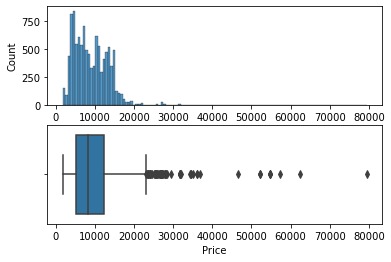

In [23]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(data = combined_data_result, x = "Price", ax = ax1)
sns.boxplot(data = combined_data_result , x = "Price", ax = ax2)
plt.show()

Handling outliers in price by replacing above 40000 prices by 3rd quantile

In [24]:
data_train["Price"] = np.where(data_train["Price"]>=40000, np.quantile(data_train["Price"],0.75), data_train["Price"])

<ipython-input-24-df2c71a4e2de>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["Price"] = np.where(data_train["Price"]>=40000, np.quantile(data_train["Price"],0.75), data_train["Price"])


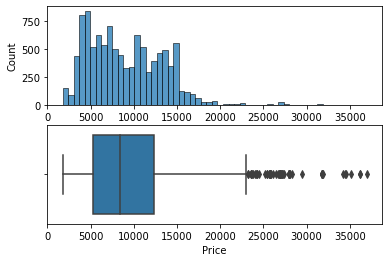

In [25]:
fig,(ax1,ax2) = plt.subplots(2,1)
sns.histplot(data = combined_data_result, x = "Price", ax = ax1)
sns.boxplot(data = combined_data_result , x = "Price", ax = ax2)
plt.show()

In [26]:
Y = data_train["Price"]
X = data_train.drop("Price", axis = 1)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [28]:
from sklearn import metrics

import pickle
def predict(ml_model, model_name, dump):
    model = ml_model.fit(X_train,y_train)
    print('Training score : {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    print('\n')
    r2_score=metrics.r2_score(y_test,y_prediction)
    print('r2 score: {}'.format(r2_score))
    print('MAE:',metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE:',metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,y_prediction)))
    #sns.histplot(y_test-y_prediction)
    
    if dump==1: # Save
        file = open(model_name+' model.pkl','wb')
        pickle.dump(model,file)

## Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
predict(LinearRegression(), "LinearRegression",1)

Training score : 0.6021094558001578
predictions are: 
 [14404.10835704  3252.63290752 10844.4101454  ...  7834.87961608
 14469.09493283  7704.98456271]


r2 score: 0.6196460458742542
MAE: 1927.6557268969193
MSE: 7378050.704485787
RMSE: 2716.256744949893


## Decision Tree

In [30]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(), "DecisionTree",1)

Training score : 0.966135634131347
predictions are: 
 [14173.5  4591.  11134.  ...  5883.  17471.   8907. ]


r2 score: 0.7631816236097381
MAE: 1278.2019341756356
MSE: 4593768.435449747
RMSE: 2143.3078256400195


## Random Forest

In [31]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(), "RandomForest",1)

Training score : 0.9525749227318019
predictions are: 
 [15968.367      4432.14      12407.7147381 ...  5970.52      17336.14
  8829.22     ]


r2 score: 0.8397211342331947
MAE: 1110.5644720549817
MSE: 3109066.136049708
RMSE: 1763.2544161435433


## Now Prediction on test set

In [33]:
def predict_test(model_name, X_test):
    data = open(model_name + " model.pkl","rb")
    model = pickle.load(data) 
    y_prediction = model.predict(X_test)
    print('predictions are: \n {}'.format(y_prediction))
    #return(y_prediction)

In [34]:
predict_test("LinearRegression",data_test)

predictions are: 
 [ 7237.19149931 11070.73166073 10156.68850038 ... 12359.30737883
  9505.23172944 10479.66996173]


In [35]:
predict_test("DecisionTree",data_test)

predictions are: 
 [ 4226.  16079.  10977.5 ... 13843.  11522.   7155. ]


In [36]:
predict_test("RandomForest",data_test)

predictions are: 
 [ 4290.82       15107.43733333  9713.82304762 ... 14522.92
 13108.78        7591.2       ]
